# Real Time Road Detection

- https://www.youtube.com/watch?v=BgA9asLpkJU&t=49s

In [100]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Load the video
src = cv2.VideoCapture('/Users/jane/Desktop/dev/OpenCV/data/drive_cam.mp4')

## 1 Image load from Video

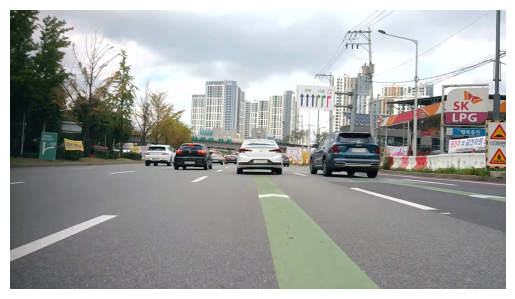

In [101]:
frame_number = 100

# Set the video position to the specified frame number
src.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

# Read the frame
ret, frame = src.read()

if ret:
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Display the image in the Jupyter Notebook
    plt.imshow(frame_rgb)
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print(f"Could not extract frame {frame_number}")

src.release()

## 2 Preprocessing the image

convert the image to the grayscale andn run Gaussian filter to remove small edges

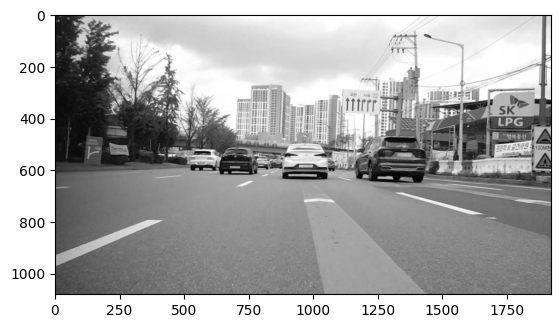

In [102]:
gray = cv2.cvtColor(frame_rgb, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(gray, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (11,11), 1)
plt.imshow(gray, cmap='gray')

- kinda loop to fine best edges (canny edge detection)

In [ ]:
# Get the height and width of the image
height, width = frame_rgb.shape[:2]

# Divide the image into two parts: top half and bottom half
top_half = frame_rgb[:2*height//3, :]
bottom_half = frame_rgb[2*height//3:, :]

# Apply Gaussian blur to the top half
blurred_top_half = cv2.GaussianBlur(top_half, (21, 21), 0)

# Combine the blurred top half with the bottom half
result_image = np.vstack((blurred_top_half, bottom_half))
gray = result_image

plt.imshow(result_image)

## 3 Canny Edge Detection

create edges

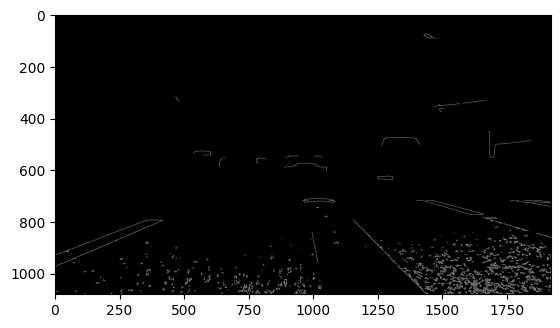

In [116]:
edges = cv2.Canny(gray, 50, 200)
plt.imshow(edges, cmap='gray')

## 4 Apply HoughLines

1. edges: Output of edge detector
2. lines: A vector to store the coordinates of the start and end of the lines
3. rho: The resolution parameter rho in pixels
4. thetha: The resolution of the parameter theta in radians
5. threshold: The minimum number of intersecting points to detct a line

- thetas and rhos
- distance of and edge point < maxLineGap -> assumed that edge lies on that line
- lines which has edge pixels > minLineLength -> identified and saved

397 804 414 797
1534 752 1539 753
1790 825 1797 827
1245 889 1258 902
252 865 257 863
359 819 372 814
141 913 153 908
4 971 9 969
144 875 153 872
376 813 392 806
28 919 36 916
320 808 330 804
1496 741 1508 744
1220 863 1236 879
1415 1058 1421 1058
1471 734 1477 736
185 859 217 847
211 883 216 881
1905 859 1910 860
271 857 293 848
1578 765 1600 771
1703 1049 1709 1049
1616 1066 1622 1066
1396 1012 1403 1013
1799 1047 1804 1047
1701 1038 1710 1038
711 1066 720 1066
1439 987 1446 987
1516 747 1533 752
1646 1067 1655 1067
43 955 51 952
1880 851 1893 854
107 889 116 886
348 824 357 820
1477 1040 1482 1040
713 1069 719 1069
162 904 167 902
1547 1058 1562 1058
1746 1047 1752 1047
294 848 300 845
1806 1047 1812 1047
1757 1054 1764 1055
1262 906 1267 911
1559 1056 1564 1056
1875 1060 1880 1060
1703 1040 1708 1040
237 839 243 837
264 829 295 817
1738 1061 1743 1061
750 1059 755 1059
1619 1054 1626 1054
1847 1065 1852 1065
1866 991 1871 991
1537 1063 1544 1063
1439 1052 1444 1052
1403 996 1409 99

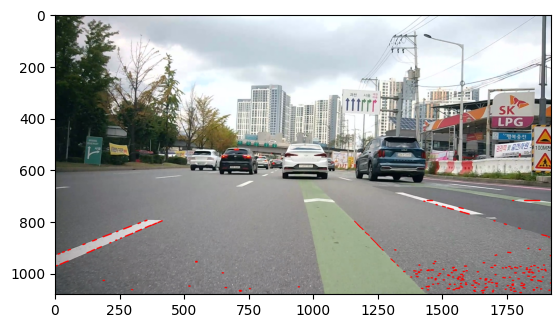

In [119]:
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=100, minLineLength=5)

for line in lines:
    x1, y1, x2, y2 = line[0]
    print(x1, y1, x2, y2)

    if (y1 > 400 or y2>400):
        cv2.line(frame_rgb, (x1,y1), (x2,y2), (255,0,0), 3)

plt.imshow(frame_rgb)